In [39]:
from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline


import flotilla
sns.set(style='white', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

folder = 'figures'

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects/'

# study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering', flotilla_dir=flotilla_dir)

In [40]:
miso_calculated_psi = pd.read_csv('/projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper/miso_ids_outrigger_calculated_psi.csv')
print(miso_calculated_psi.shape)
miso_calculated_psi.head()

(1926274, 5)


,sample_id,miso_id,outrigger_psi,notes,notes_abbrev
0,CVN_35,chr10:100150355:100150511:-@chr10:100148111:10...,NaN,Case 3: All junctions with insufficient reads,Case 3
1,CVN_17,chr10:100174766:100174978:-@chr10:100174489:10...,NaN,Case 3: All junctions with insufficient reads,Case 3
2,CVN_35,chr10:100174766:100174978:-@chr10:100174489:10...,NaN,Case 3: All junctions with insufficient reads,Case 3
3,M2nd_33,chr10:100174766:100174978:-@chr10:100174489:10...,NaN,Case 3: All junctions with insufficient reads,Case 3
4,M2nd_34,chr10:100174766:100174978:-@chr10:100174489:10...,NaN,Case 3: All junctions with insufficient reads,Case 3


In [41]:
miso_psi_filename = '/projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnms/splicing.csv.gz'
miso_psi = pd.read_csv(miso_psi_filename, index_col=0, compression='gzip')
print(miso_psi.shape)
miso_psi.head()

(275, 63201)


,chr10:100148111:100148265:-@chr10:100147622:100147841:-@chr10:100146958:100147064:-,chr10:100150355:100150511:-@chr10:100148111:100148265:-@chr10:100146958:100147064:-,chr10:100150839:100150628|100150767:-@chr10:100150355:100150511:-,chr10:100170715:100170370|100170696:-@chr10:100167661:100167754:-,chr10:100174766:100174978:-@chr10:100174489:100174591:-@chr10:100173705:100174052:-,chr10:100185575:100185742:-@chr10:100185441|100185477:100185298:-,chr10:100186972:100187021:-@chr10:100185575:100185742:-@chr10:100185298:100185477:-,chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-,chr10:100193697:100193848:-@chr10:100190888:100191048:-@chr10:100190328:100190427:-,chr10:100193740:100193848:-@chr10:100190888:100191048:-@chr10:100190328:100190427:-,...,chrY:59222127:59222216|59222281:+@chrY:59230782:59230919:+,chrY:59222127:59222277|59222281:+@chrY:59230782:59230919:+,chrY:59222127:59222281:+@chrY:59228292:59228349:+@chrY:59230782:59230919:+,chrY:59233167:59233257:+@chrY:59252483:59252550:+@chrY:59272371:59272463:+,chrY:6780129:6780213:+@chrY:6846254:6846284:+@chrY:6863845:6863939:+@chrY:6889490:6889578:+,chrY:6846254:6846284:+@chrY:6863845:6863939:+@chrY:6889490:6889578:+,chrY:6889490:6889578:+@chrY:6893076:6893183:+@chrY:6911021:6911166:+,chrY:6931938:6932190:+@chrY:6934736:6934869:+@chrY:6938237:6938369:+,chrY:9236076-9236162:+@chrY:9236424-9236561:+,chrY:9365535-9365621:+@chrY:9365883-9366020:+
M1_01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M1_02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M1_03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.87,0.82,0.94,0.97,NaN,NaN,NaN,NaN,NaN,NaN
M1_04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M1_05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
miso_psi_min_cells = miso_psi.loc[:, miso_psi.notnull().sum() >= 10]
print(miso_psi_min_cells.shape)

(275, 41750)


In [45]:
miso_psi_tidy = miso_psi.unstack().reset_index()
miso_psi_tidy = miso_psi_tidy.rename(columns={'level_0':'miso_id', 'level_1':'sample_id', 0:'miso_psi'})
print(miso_psi_tidy.shape)
# miso_psi_tidy = miso_psi_tidy.dropna()
print(miso_psi_tidy.shape)
miso_psi_tidy.head()

(17380275, 3)
(17380275, 3)


,miso_id,sample_id,miso_psi
0,chr10:100148111:100148265:-@chr10:100147622:10...,M1_01,NaN
1,chr10:100148111:100148265:-@chr10:100147622:10...,M1_02,NaN
2,chr10:100148111:100148265:-@chr10:100147622:10...,M1_03,NaN
3,chr10:100148111:100148265:-@chr10:100147622:10...,M1_04,NaN
4,chr10:100148111:100148265:-@chr10:100147622:10...,M1_05,NaN


In [46]:
figure_folder = 'figures/008_get_miso_false_positive_psi'
! mkdir -p $figure_folder

In [47]:
from __future__ import print_function

In [48]:
miso_calculated_psi.shape

(1926274, 5)

In [49]:
miso_psi_tidy.shape

(17380275, 3)

In [50]:
cols = ['miso_id', 'sample_id']

miso_psi_comparison = miso_psi_tidy.merge(miso_calculated_psi, left_on=cols, right_on=cols)
print(miso_psi_comparison.shape)
miso_psi_comparison.head()

(1925988, 6)


,miso_id,sample_id,miso_psi,outrigger_psi,notes,notes_abbrev
0,chr10:100150355:100150511:-@chr10:100148111:10...,CVN_35,0.15,NaN,Case 3: All junctions with insufficient reads,Case 3
1,chr10:100174766:100174978:-@chr10:100174489:10...,M2nd_34,NaN,NaN,Case 3: All junctions with insufficient reads,Case 3
2,chr10:100174766:100174978:-@chr10:100174489:10...,M2nd_33,NaN,NaN,Case 3: All junctions with insufficient reads,Case 3
3,chr10:100174766:100174978:-@chr10:100174489:10...,CVN_17,0.09,NaN,Case 3: All junctions with insufficient reads,Case 3
4,chr10:100174766:100174978:-@chr10:100174489:10...,CVN_35,NaN,NaN,Case 3: All junctions with insufficient reads,Case 3


In [51]:
miso_psi_comparison_dropna = miso_psi_comparison.dropna(subset=['miso_psi', 'outrigger_psi'], how='all')
print(miso_psi_comparison_dropna.shape)
miso_psi_comparison_dropna.head()

(1445316, 6)


,miso_id,sample_id,miso_psi,outrigger_psi,notes,notes_abbrev
0,chr10:100150355:100150511:-@chr10:100148111:10...,CVN_35,0.15,NaN,Case 3: All junctions with insufficient reads,Case 3
3,chr10:100174766:100174978:-@chr10:100174489:10...,CVN_17,0.09,NaN,Case 3: All junctions with insufficient reads,Case 3
5,chr10:100186972:100187021:-@chr10:100185575:10...,M2_05,0.94,NaN,Case 4: Only one junction with sufficient reads,Case 4
6,chr10:100186972:100187021:-@chr10:100185575:10...,MSA_31,0.85,NaN,Case 3: All junctions with insufficient reads,Case 3
7,chr10:100186972:100187021:-@chr10:100185575:10...,P2_12,0.98,1.0,Case 7: Inclusion,Case 7


In [56]:
len(miso_psi_comparison_dropna.groupby(['miso_id']).size())

36526

In [59]:
miso_psi_comparison_dropna.groupby('notes').size()

notes
Case 10a: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are sufficient junction reads       34533
Case 10b: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are insufficient junction reads       357
Case 11a: Isoform1 and Isoform2 each have both sufficient and insufficient junctions: There are sufficient junction reads                   25
Case 11b: Isoform1 and Isoform2 each have both sufficient and insufficient junctions: There are insufficient junction reads                 17
Case 1: >= 10 reads on junctions that are incompatible with the annotation                                                              117367
Case 2: Zero observed reads                                                                                                               2834
Case 3: All junctions with insufficient reads                                                                                           

In [57]:
miso_psi_comparison_dropna_min_cells = miso_psi_comparison_dropna.groupby('miso_id').filter(lambda x: len(x) >= 10)
print(miso_psi_comparison_dropna_min_cells.shape)
miso_psi_comparison_dropna_min_cells.head()

(1395467, 6)


,miso_id,sample_id,miso_psi,outrigger_psi,notes,notes_abbrev
12,chr10:100190328:100190427:-@chr10:100189548:10...,MSA_18,0.08,NaN,Case 3: All junctions with insufficient reads,Case 3
13,chr10:100190328:100190427:-@chr10:100189548:10...,MSA_24,1.00,1.0,Case 7: Inclusion,Case 7
15,chr10:100190328:100190427:-@chr10:100189548:10...,P1_06,NaN,1.0,Case 7: Inclusion,Case 7
16,chr10:100190328:100190427:-@chr10:100189548:10...,P1_08,0.88,NaN,Case 4: Only one junction with sufficient reads,Case 4
18,chr10:100190328:100190427:-@chr10:100189548:10...,P1_10,0.03,0.0,Case 6: Exclusion,Case 6


In [58]:
len(miso_psi_comparison_dropna_min_cells.groupby('miso_id').size())

23486

In [61]:
miso_psi_comparison_dropna_min_cells.groupby('notes').size()

notes
Case 10a: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are sufficient junction reads       34096
Case 10b: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are insufficient junction reads       342
Case 11a: Isoform1 and Isoform2 each have both sufficient and insufficient junctions: There are sufficient junction reads                   25
Case 11b: Isoform1 and Isoform2 each have both sufficient and insufficient junctions: There are insufficient junction reads                 17
Case 1: >= 10 reads on junctions that are incompatible with the annotation                                                              114552
Case 2: Zero observed reads                                                                                                               2576
Case 3: All junctions with insufficient reads                                                                                           

In [62]:
case_order = ['Case {}'.format(i+1) for i in range(8)] + ['Case {}{}'.format(i+1, x) for i in range(8, 11) for x in 'ab']
case_order

['Case 1',
 'Case 2',
 'Case 3',
 'Case 4',
 'Case 5',
 'Case 6',
 'Case 7',
 'Case 8',
 'Case 9a',
 'Case 9b',
 'Case 10a',
 'Case 10b',
 'Case 11a',
 'Case 11b']

In [63]:
miso_psi_comparison_dropna.shape

(1445316, 6)

In [64]:
miso_junction_reads2d = pd.read_csv('/projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper/miso_junction_reads2d.csv')
print(miso_junction_reads2d.shape)
miso_junction_reads2d.head()

(1926274, 9)


,sample_id,miso_id,junction_12,junction_13,junction_14,junction_23,junction_24,junction_34,splice_type
0,CVN_35,chr10:100150355:100150511:-@chr10:100148111:10...,NaN,9.0,NaN,NaN,NaN,NaN,SE
1,CVN_17,chr10:100174766:100174978:-@chr10:100174489:10...,NaN,7.0,NaN,NaN,NaN,NaN,SE
2,CVN_35,chr10:100174766:100174978:-@chr10:100174489:10...,NaN,8.0,NaN,NaN,NaN,NaN,SE
3,M2nd_33,chr10:100174766:100174978:-@chr10:100174489:10...,NaN,2.0,NaN,NaN,NaN,NaN,SE
4,M2nd_34,chr10:100174766:100174978:-@chr10:100174489:10...,NaN,4.0,NaN,NaN,NaN,NaN,SE


In [66]:
cols = ['miso_id', 'sample_id']
miso_psi_comparison_dropna_junctions = miso_psi_comparison_dropna_min_cells.merge(miso_junction_reads2d, left_on=cols, right_on=cols)
print(miso_psi_comparison_dropna_junctions.shape)
miso_psi_comparison_dropna_junctions.head()

(1395467, 13)


,miso_id,sample_id,miso_psi,outrigger_psi,notes,notes_abbrev,junction_12,junction_13,junction_14,junction_23,junction_24,junction_34,splice_type
0,chr10:100190328:100190427:-@chr10:100189548:10...,MSA_18,0.08,NaN,Case 3: All junctions with insufficient reads,Case 3,NaN,8.0,NaN,NaN,NaN,NaN,SE
1,chr10:100190328:100190427:-@chr10:100189548:10...,MSA_24,1.00,1.0,Case 7: Inclusion,Case 7,65.0,NaN,NaN,52.0,NaN,NaN,SE
2,chr10:100190328:100190427:-@chr10:100189548:10...,P1_06,NaN,1.0,Case 7: Inclusion,Case 7,12.0,NaN,NaN,11.0,NaN,NaN,SE
3,chr10:100190328:100190427:-@chr10:100189548:10...,P1_08,0.88,NaN,Case 4: Only one junction with sufficient reads,Case 4,22.0,NaN,NaN,NaN,NaN,NaN,SE
4,chr10:100190328:100190427:-@chr10:100189548:10...,P1_10,0.03,0.0,Case 6: Exclusion,Case 6,NaN,43.0,NaN,NaN,NaN,NaN,SE


In [67]:
miso_psi_comparison_dropna_junctions.to_csv('/projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper/miso_psi_comparison_junction_reads2d.csv', 
                                            index=False)

In [68]:
miso_psi_outrigger_na = miso_psi_comparison_dropna_junctions.loc[miso_psi_comparison_dropna_junctions['outrigger_psi'].isnull()]
print(miso_psi_outrigger_na.shape)
miso_psi_outrigger_na.head()

(545317, 13)


,miso_id,sample_id,miso_psi,outrigger_psi,notes,notes_abbrev,junction_12,junction_13,junction_14,junction_23,junction_24,junction_34,splice_type
0,chr10:100190328:100190427:-@chr10:100189548:10...,MSA_18,0.08,NaN,Case 3: All junctions with insufficient reads,Case 3,NaN,8.0,NaN,NaN,NaN,NaN,SE
3,chr10:100190328:100190427:-@chr10:100189548:10...,P1_08,0.88,NaN,Case 4: Only one junction with sufficient reads,Case 4,22.0,NaN,NaN,NaN,NaN,NaN,SE
22,chr10:100190328:100190427:-@chr10:100189548:10...,CVN_17,0.92,NaN,Case 4: Only one junction with sufficient reads,Case 4,12.0,NaN,NaN,3.0,NaN,NaN,SE
24,chr10:100193697:100193848:-@chr10:100190888:10...,MSA_18,0.90,NaN,Case 3: All junctions with insufficient reads,Case 3,NaN,NaN,NaN,3.0,NaN,NaN,SE
25,chr10:100193697:100193848:-@chr10:100190888:10...,MSA_24,0.99,NaN,Case 4: Only one junction with sufficient reads,Case 4,NaN,NaN,NaN,47.0,NaN,NaN,SE


In [69]:
miso_false_positive_percent = 100 * float(miso_psi_outrigger_na.shape[0])/miso_psi_comparison_dropna_junctions['miso_psi'].notnull().sum()
miso_false_positive_percent

45.129284375972404

In [70]:
sns.set(context='paper', style='white')

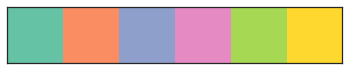

In [71]:
set2 = sns.color_palette('Set2')
sns.palplot(set2)
false_positive_color = set2[1]
false_negative_color = set2[0]

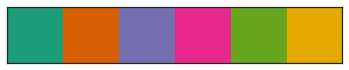

In [72]:
dark2 = sns.color_palette('Dark2')
sns.palplot(dark2)

false_positive_label = dark2[1]
false_negative_label = dark2[0]

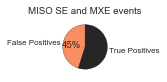

In [73]:
fig, ax = plt.subplots(figsize=(1, 1))
plt.pie([miso_false_positive_percent, 100-miso_false_positive_percent], startangle=90, 
        colors=[false_positive_color, '#262626'], 
        labels=['False Positives', 'True Positives'], autopct='%.0f%%')
ax.set(title='MISO SE and MXE events')
fig.savefig('{}/miso_false_positives_pie.pdf'.format(figure_folder))

In [74]:
miso_psi_outrigger_na.groupby('notes').size()

notes
Case 10b: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are insufficient junction reads       342
Case 11b: Isoform1 and Isoform2 each have both sufficient and insufficient junctions: There are insufficient junction reads                 17
Case 1: >= 10 reads on junctions that are incompatible with the annotation                                                              114552
Case 2: Zero observed reads                                                                                                               2576
Case 3: All junctions with insufficient reads                                                                                           120043
Case 4: Only one junction with sufficient reads                                                                                         267087
Case 5: Unequal read coverage (one side has at least 10x more reads)                                                                    

In [75]:
sns.set(context='paper', style='whitegrid')

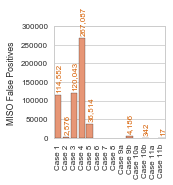

In [76]:
fig, ax = plt.subplots(figsize=(2, 2))

# outrigger_na_case_order = ['Case 3', 'Case 4', 'Case 6', 'Case 10b', 'Case 11b', 'Case 12b']

sns.countplot(x='notes_abbrev', data=miso_psi_outrigger_na, color=false_positive_color, order=case_order)

miso_psi_outrigger_na_sizes = miso_psi_outrigger_na.groupby('notes_abbrev').size()
ymin, ymax = ax.get_ylim()
yrange = ymax - ymin
yoffset = 0.025 * ymax

for i, case in enumerate(case_order):
    if case in miso_psi_outrigger_na_sizes:
        y = miso_psi_outrigger_na_sizes[case]
        ax.annotate("{:,}".format(y), (i+0.2, y + yoffset), rotation=90, fontsize=8, 
                    va='bottom', ha='center', color=false_positive_label)
plt.setp(ax.get_xticklabels(), rotation=90);
ax.set(xlabel='', ylabel='MISO False Positives')
fig.savefig('{}/outrigger_na_cases.pdf'.format(figure_folder))

In [90]:
pd.options.display.max_colwidth = 200

In [91]:
rows = miso_psi_comparison_dropna_junctions['miso_psi'].isnull() & miso_psi_comparison_dropna_junctions['outrigger_psi'].notnull()
miso_na_outrigger_psi = miso_psi_comparison_dropna_junctions.loc[rows]
print(miso_na_outrigger_psi.shape)
miso_na_outrigger_psi.head()

(187123, 13)


,miso_id,sample_id,miso_psi,outrigger_psi,notes,notes_abbrev,junction_12,junction_13,junction_14,junction_23,junction_24,junction_34,splice_type
2,chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-,P1_06,NaN,1.0,Case 7: Inclusion,Case 7,12.0,NaN,NaN,11.0,NaN,NaN,SE
8,chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-,P2_11,NaN,0.0,Case 6: Exclusion,Case 6,NaN,123.0,NaN,NaN,NaN,NaN,SE
12,chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-,P7_11,NaN,0.0,Case 6: Exclusion,Case 6,NaN,12.0,NaN,NaN,NaN,NaN,SE
17,chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-,P4_01,NaN,0.0,Case 6: Exclusion,Case 6,NaN,29.0,NaN,NaN,NaN,NaN,SE
31,chr10:100193697:100193848:-@chr10:100190888:100191048:-@chr10:100190328:100190427:-,P2_10,NaN,1.0,Case 7: Inclusion,Case 7,228.0,NaN,NaN,300.0,NaN,NaN,SE


In [93]:
miso_na_outrigger_psi.tail()

,miso_id,sample_id,miso_psi,outrigger_psi,notes,notes_abbrev,junction_12,junction_13,junction_14,junction_23,junction_24,junction_34,splice_type
1395453,chrY:59233167:59233257:+@chrY:59252483:59252550:+@chrY:59272371:59272463:+,M4_05,NaN,1.0,Case 7: Inclusion,Case 7,46.0,NaN,NaN,54.0,NaN,NaN,SE
1395456,chrY:59233167:59233257:+@chrY:59252483:59252550:+@chrY:59272371:59272463:+,P3_01,NaN,1.0,Case 7: Inclusion,Case 7,94.0,NaN,NaN,127.0,NaN,NaN,SE
1395461,chrY:59233167:59233257:+@chrY:59252483:59252550:+@chrY:59272371:59272463:+,CVN_03,NaN,1.0,Case 7: Inclusion,Case 7,261.0,NaN,NaN,248.0,NaN,NaN,SE
1395462,chrY:59233167:59233257:+@chrY:59252483:59252550:+@chrY:59272371:59272463:+,CVN_04,NaN,1.0,Case 7: Inclusion,Case 7,102.0,NaN,NaN,87.0,NaN,NaN,SE
1395464,chrY:59233167:59233257:+@chrY:59252483:59252550:+@chrY:59272371:59272463:+,CVN_17,NaN,1.0,Case 7: Inclusion,Case 7,24.0,NaN,NaN,36.0,NaN,NaN,SE


In [92]:
miso_na_outrigger_psi.groupby('notes').size()

notes
Case 10a: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are sufficient junction reads     6939
Case 11a: Isoform1 and Isoform2 each have both sufficient and insufficient junctions: There are sufficient junction reads                 4
Case 6: Exclusion                                                                                                                     89285
Case 7: Inclusion                                                                                                                     74375
Case 8: Sufficient reads on all junctions                                                                                              8010
Case 9a: Isoform1 with sufficient reads but Isoform2 has 1+ junctions with insufficient reads: There are sufficient junction reads     8510
dtype: int64

In [94]:
miso_na_outrigger_psi.query("notes == 'Case 8: Sufficient reads on all junctions'")

,miso_id,sample_id,miso_psi,outrigger_psi,notes,notes_abbrev,junction_12,junction_13,junction_14,junction_23,junction_24,junction_34,splice_type
137,chr10:101507014:101507147:+@chr10:101510126:101510153:+@chr10:101514286:101514391:+,P1_11,NaN,0.872792,Case 8: Sufficient reads on all junctions,Case 8,233.0,36.0,NaN,261.0,NaN,NaN,SE
152,chr10:101507014:101507147:+@chr10:101510126:101510153:+@chr10:101514286:101514391:+,P7_06,NaN,0.710526,Case 8: Sufficient reads on all junctions,Case 8,275.0,121.0,NaN,319.0,NaN,NaN,SE
153,chr10:101507014:101507147:+@chr10:101510126:101510153:+@chr10:101514286:101514391:+,P7_09,NaN,0.737500,Case 8: Sufficient reads on all junctions,Case 8,375.0,147.0,NaN,451.0,NaN,NaN,SE
160,chr10:101507014:101507147:+@chr10:101510126:101510153:+@chr10:101514286:101514391:+,P9_04,NaN,0.994001,Case 8: Sufficient reads on all junctions,Case 8,2034.0,13.0,NaN,2274.0,NaN,NaN,SE
169,chr10:101507014:101507147:+@chr10:101510126:101510153:+@chr10:101514286:101514391:+,P4_01,NaN,0.582090,Case 8: Sufficient reads on all junctions,Case 8,70.0,56.0,NaN,86.0,NaN,NaN,SE
184,chr10:101507014:101507147:+@chr10:101510126:101510153:+@chr10:101514286:101514391:+,CVN_22,NaN,0.203095,Case 8: Sufficient reads on all junctions,Case 8,47.0,206.0,NaN,58.0,NaN,NaN,SE
189,chr10:101507014:101507147:+@chr10:101510126:101510153:+@chr10:101514286:101514391:+,CVN_35,NaN,0.246753,Case 8: Sufficient reads on all junctions,Case 8,26.0,87.0,NaN,31.0,NaN,NaN,SE
1554,chr10:102747070:102747272:-@chr10:102746847:102746953:-@chr10:102746506:102746732:-,P1_06,NaN,0.958246,Case 8: Sufficient reads on all junctions,Case 8,193.0,10.0,NaN,266.0,NaN,NaN,SE
2286,chr10:103360960:103361093:+@chr10:103368592:103368694:+@chr10:103369124:103369410:+,N4_05,NaN,0.910345,Case 8: Sufficient reads on all junctions,Case 8,143.0,13.0,NaN,121.0,NaN,NaN,SE
2531,chr10:103557737:103557911:-@chr10:103553670:103553755:-@chr10:103552596:103552700:-,P3_03,NaN,0.643622,Case 8: Sufficient reads on all junctions,Case 8,420.0,183.0,NaN,241.0,NaN,NaN,SE


In [79]:
miso_false_negative_percent = 100 * float(miso_na_outrigger_psi.shape[0])/miso_psi_comparison_dropna['outrigger_psi'].notnull().sum()
miso_false_negative_percent

21.450622060359287

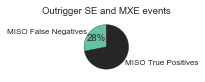

In [80]:
fig, ax = plt.subplots(figsize=(1, 1))
plt.pie([miso_false_negative_percent, 100-miso_false_positive_percent], startangle=90, 
        colors=[false_negative_color, '#262626'], 
        labels=['MISO False Negatives', 'MISO True Positives'], autopct='%.0f%%')
ax.set(title='Outrigger SE and MXE events')
fig.savefig('{}/miso_false_negatives_pie.pdf'.format(figure_folder))

In [1]:
# fig, ax = plt.subplots(figsize=(2, 2))

# miso_na_case_order = ['Case 7', 'Case 8', 'Case 9', 'Case 10a', 'Case 11a', 'Case 12a']

# sns.countplot(x='notes_abbrev', data=miso_na_outrigger_psi, color=false_negative_color, order=case_order)

# miso_na_outrigger_psi_sizes = miso_na_outrigger_psi.groupby('notes_abbrev').size()
# ymin, ymax = ax.get_ylim()
# yrange = ymax - ymin
# yoffset = 0.025 * ymax

# for i, case in enumerate(case_order):
#     if case in miso_na_outrigger_psi_sizes:
#         y = miso_na_outrigger_psi_sizes[case]
#         ax.annotate("{:,}".format(y), (i+0.2, y + yoffset), rotation=90, fontsize=8, 
#                     va='bottom', ha='center', color=false_negative_label)
# plt.setp(ax.get_xticklabels(), rotation=90);
# ax.set(xlabel='', ylabel='MISO False Negatives')
# fig.savefig('{}/miso_na_cases.pdf'.format(figure_folder))

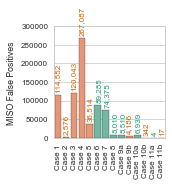

In [82]:
fig, ax = plt.subplots(figsize=(2, 2))

# outrigger_na_case_order = ['Case 3', 'Case 4', 'Case 6', 'Case 10b', 'Case 11b', 'Case 12b']

sns.countplot(x='notes_abbrev', data=miso_psi_outrigger_na, color=false_positive_color, order=case_order)
sns.countplot(x='notes_abbrev', data=miso_na_outrigger_psi, color=false_negative_color, order=case_order)

ymin, ymax = ax.get_ylim()
yrange = ymax - ymin
yoffset = 0.025 * ymax


for i, case in enumerate(case_order):
    if case in miso_na_outrigger_psi_sizes:
        y = miso_na_outrigger_psi_sizes[case]
        ax.annotate("{:,}".format(y), (i+0.2, y + yoffset), rotation=90, fontsize=8, 
                    va='bottom', ha='center', color=false_negative_label)

for i, case in enumerate(case_order):
    if case in miso_psi_outrigger_na_sizes:
        y = miso_psi_outrigger_na_sizes[case]
        ax.annotate("{:,}".format(y), (i+0.1, y + yoffset), rotation=90, fontsize=8, 
                    va='bottom', ha='center', color=false_positive_label)
plt.setp(ax.get_xticklabels(), rotation=90);
ax.set(xlabel='', ylabel='MISO False Positives')
fig.savefig('{}/miso_outrigger_na_cases.pdf'.format(figure_folder))

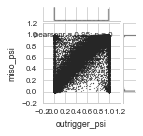

In [83]:
g = sns.jointplot('outrigger_psi', 'miso_psi', miso_psi_comparison_dropna, color='#262626', 
                  joint_kws=dict(alpha=0.5, rasterized=True, s=1), size=2)
g.savefig('{}/outrigger_vs_miso_psi.pdf'.format(figure_folder), dpi=300)

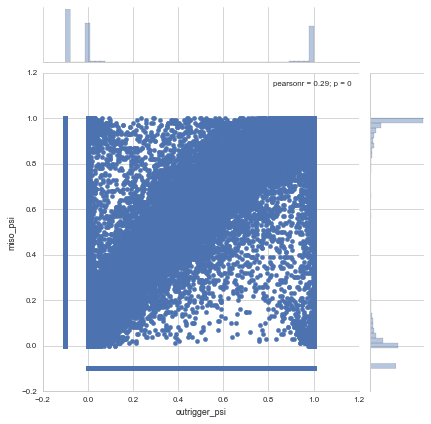

In [84]:
g = sns.jointplot('outrigger_psi', 'miso_psi', miso_psi_comparison_dropna.fillna(-0.1))

In [85]:
miso_psi_comparison_dropna_fillna = miso_psi_comparison_dropna.fillna(-0.1)
print(miso_psi_comparison_dropna_fillna.shape)
miso_psi_comparison_dropna_fillna.head()

(1445316, 6)


,miso_id,sample_id,miso_psi,outrigger_psi,notes,notes_abbrev
0,chr10:100150355:100150511:-@chr10:100148111:10...,CVN_35,0.15,-0.1,Case 3: All junctions with insufficient reads,Case 3
3,chr10:100174766:100174978:-@chr10:100174489:10...,CVN_17,0.09,-0.1,Case 3: All junctions with insufficient reads,Case 3
5,chr10:100186972:100187021:-@chr10:100185575:10...,M2_05,0.94,-0.1,Case 4: Only one junction with sufficient reads,Case 4
6,chr10:100186972:100187021:-@chr10:100185575:10...,MSA_31,0.85,-0.1,Case 3: All junctions with insufficient reads,Case 3
7,chr10:100186972:100187021:-@chr10:100185575:10...,P2_12,0.98,1.0,Case 7: Inclusion,Case 7


In [86]:
case_order

['Case 1',
 'Case 2',
 'Case 3',
 'Case 4',
 'Case 5',
 'Case 6',
 'Case 7',
 'Case 8',
 'Case 9a',
 'Case 9b',
 'Case 10a',
 'Case 10b',
 'Case 11a',
 'Case 11b']

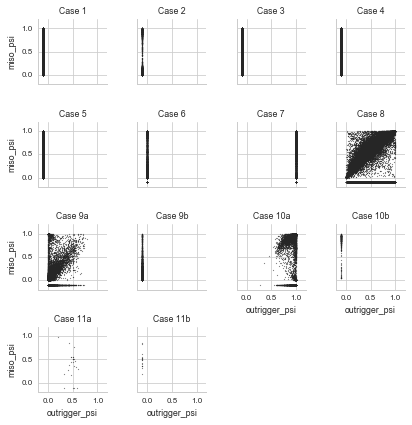

In [87]:
g = sns.FacetGrid(miso_psi_comparison_dropna_fillna, col='notes_abbrev', col_wrap=4, col_order=case_order, size=1.5)
g.map(plt.scatter, 'outrigger_psi', 'miso_psi', alpha=0.5, color='#262626', rasterized=True, s=1)
g.set_titles('{col_name}')
g.set(xticks=[0, 0.5, 1], yticks=[0, 0.5, 1])
g.savefig('{}/outrigger_vs_miso_psi_faceted.pdf'.format(figure_folder), dpi=300)

In [88]:
miso_psi_comparison_dropna_fillna['either_na'] = "True Positive"
miso_psi_comparison_dropna_fillna.loc[miso_psi_comparison_dropna['outrigger_psi'].isnull(), 'either_na'] = 'False Positive'
miso_psi_comparison_dropna_fillna.loc[miso_psi_comparison_dropna['miso_psi'].isnull(), 'either_na'] = 'False Negative'
miso_psi_comparison_dropna_fillna.head()

,miso_id,sample_id,miso_psi,outrigger_psi,notes,notes_abbrev,either_na
0,chr10:100150355:100150511:-@chr10:100148111:10...,CVN_35,0.15,-0.1,Case 3: All junctions with insufficient reads,Case 3,False Positive
3,chr10:100174766:100174978:-@chr10:100174489:10...,CVN_17,0.09,-0.1,Case 3: All junctions with insufficient reads,Case 3,False Positive
5,chr10:100186972:100187021:-@chr10:100185575:10...,M2_05,0.94,-0.1,Case 4: Only one junction with sufficient reads,Case 4,False Positive
6,chr10:100186972:100187021:-@chr10:100185575:10...,MSA_31,0.85,-0.1,Case 3: All junctions with insufficient reads,Case 3,False Positive
7,chr10:100186972:100187021:-@chr10:100185575:10...,P2_12,0.98,1.0,Case 7: Inclusion,Case 7,True Positive


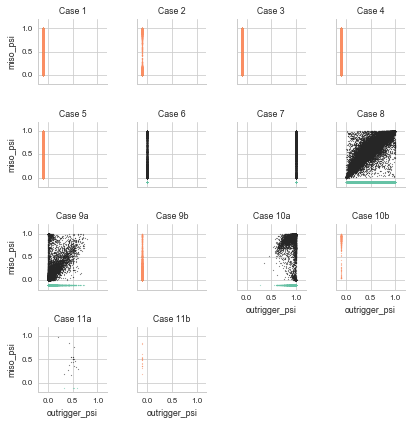

In [89]:
g = sns.FacetGrid(miso_psi_comparison_dropna_fillna, col='notes_abbrev', 
                  col_wrap=4, col_order=case_order, size=1.5, hue='either_na', 
                  hue_order=['False Positive', 'False Negative', 'True Positive'],
                  palette=[false_positive_color, false_negative_color, '#262626'])
g.map(plt.scatter, 'outrigger_psi', 'miso_psi', alpha=0.5, rasterized=True, s=1)
g.set_titles('{col_name}')
g.set(xticks=[0, 0.5, 1], yticks=[0, 0.5, 1])
g.savefig('{}/outrigger_vs_miso_psi_faceted_na_hue.pdf'.format(figure_folder), dpi=300)